In [20]:
import pandas as pd
import numpy as np
import datetime

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm

%matplotlib inline

In [9]:
start_date = datetime.datetime(2011, 1, 1)
end_date = datetime.datetime(2018, 1, 1)

date_frame = pd.date_range(start_date, end_date)

df1 = pd.DataFrame(index=date_frame)

df1.head()

""
2011-01-01
2011-01-02
2011-01-03
2011-01-04
2011-01-05


In [14]:
# for SPY
spy = pd.read_csv('data/SPY.csv', 
                 index_col='Date', 
                 parse_dates=True, 
                 usecols=['Date', 'Adj Close'])

stocks = df1.join(spy, how='inner')
stocks.rename(columns={'Adj Close': 'SPY'}, inplace=True)
stocks.head()

,SPY
2011-01-03,110.124634
2011-01-04,110.063950
2011-01-05,110.636040
2011-01-06,110.419342
2011-01-07,110.202637


In [15]:
# for amazon
amazon = pd.read_csv('data/AMZN.csv', 
                 index_col='Date', parse_dates=True, usecols=['Date', 'Adj Close'])

stocks = stocks.join(amazon, how='inner')
stocks.rename(columns={'Adj Close': 'AMZN'}, inplace=True)
stocks.head()

,SPY,AMZN
2011-01-03,110.124634,184.220001
2011-01-04,110.063950,185.009995
2011-01-05,110.636040,187.419998
2011-01-06,110.419342,185.860001
2011-01-07,110.202637,185.490005


In [17]:
# for google
google = pd.read_csv('data/GOOG.csv', 
                 index_col='Date', parse_dates=True, usecols=['Date', 'Adj Close'])

stocks = stocks.join(google, how='inner')
stocks.rename(columns={'Adj Close': 'GOOG'}, inplace=True)
stocks.head()

,SPY,AMZN,GOOG
2011-01-03,110.124634,184.220001,300.222351
2011-01-04,110.063950,185.009995,299.114563
2011-01-05,110.636040,187.419998,302.567078
2011-01-06,110.419342,185.860001,304.767792
2011-01-07,110.202637,185.490005,306.228271


In [18]:
# for apple
apple = pd.read_csv('data/AAPL.csv', 
                 index_col='Date', parse_dates=True, usecols=['Date', 'Adj Close'])

stocks = stocks.join(google, how='inner')
stocks.rename(columns={'Adj Close': 'AAPL'}, inplace=True)
stocks.head()

,SPY,AMZN,GOOG,AAPL
2011-01-03,110.124634,184.220001,300.222351,300.222351
2011-01-04,110.063950,185.009995,299.114563,299.114563
2011-01-05,110.636040,187.419998,302.567078,302.567078
2011-01-06,110.419342,185.860001,304.767792,304.767792
2011-01-07,110.202637,185.490005,306.228271,306.228271


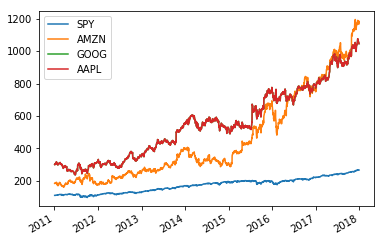

In [21]:
stocks.plot()

In [34]:
# how many days to predict into the future
forecast_interval = 5
apple = pd.DataFrame(stocks['AAPL'])
apple.rename(columns={'AAPL': 'Adj Close'}, inplace=True)
apple['Prediction'] = apple[['Adj Close']].shift(-forecast_interval)
apple.head(10)


,Adj Close,Prediction
2011-01-03,300.222351,305.120483
2011-01-04,299.114563,306.014679
2011-01-05,302.567078,306.441895
2011-01-06,304.767792,306.352478
2011-01-07,306.228271,310.073273
2011-01-10,305.120483,317.748352
2011-01-11,306.014679,313.833801
2011-01-12,306.441895,311.359894
2011-01-13,306.352478,303.938171
2011-01-14,310.073273,303.565613


In [36]:
X = np.array(apple.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_interval:]
X = X[:-forecast_interval]

y = np.array(apple['Prediction'])
y = y[:-forecast_interval]

In [42]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

X_forecast

array([[2.32825671],
       [2.31275735],
       [2.27896148],
       [2.27332128],
       [2.26534237]])

In [38]:
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9944697793339659


In [39]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[1062.88769863 1059.50185759 1052.11913728 1050.88703355 1049.14403821]
